# **"Analyzing Churn Prediction Dataset and Prediction of Customer Behaviour"**

# Step 1: Understanding the Dataset
The provided dataset is a Churn Prediction Dataset from a bank. The goal is to predict whether a customer will leave the bank **(Exited = 1)** or stay **(Exited = 0)**. This is a supervised classification problem. The dataset contains 10,000 records with features such as customer demographics, financial details, and account activity.

- **Key Columns:**
1. **CreditScore:** Customer's credit score.
2. **Geography:** Country where the customer resides.
3. **Gender:** Male or Female.
4. **Age:** Customer's age.
5. **Tenure:** Number of years the customer has been with the bank.
6. **Balance:** Account balance.
7. **NumOfProducts:** Number of products the customer has subscribed to.
8. **HasCrCard:** Whether the customer has a credit card (1 = Yes, 0 = No).
9. **IsActiveMember:** Whether the customer is an active member (1 = Yes, 0 = No).
10. **EstimatedSalary:** Customer's estimated salary.
11. **Exited:** Target variable (1 = Customer exited, 0 = Customer stayed).

In [145]:
import numpy as np
import pandas as pd
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# machine learning libraries
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# **Exploratory Data Analysis (EDA)**

# Step 2: Exploring the Data
- Inspect the dataset
- Examine unique values
- Summary Statistics

In [146]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [147]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [148]:
df.shape

(10000, 14)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Examine unique values of categorical features**

In [150]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Geography:
['France' 'Spain' 'Germany']

Unique values in Gender:
['Female' 'Male']

Unique values in HasCrCard:
[1 0]

Unique values in IsActiveMember:
[1 0]

Unique values in Exited:
[1 0]


**Summary Statistics**

In [151]:
# describe numric columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [152]:
# describe category columns
df.describe(include='O').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Imbalanced Data**

In [153]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

# Step 3: Data Cleaning
- Drop irrelevant columns
- Check for missing values
- Check for duplicate rows
- Analyze data types
- Check for Outliers

**Drop irrelevant columns**

In [154]:
df = df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [155]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

the dataset is clean

**Check for Duplicates**

In [156]:
df.duplicated().sum()

0

this dataset has no duplicated rows

**Analyze Data types**

In [157]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Geography and Gender need to be encoded before modeling

**Check for Outliers**

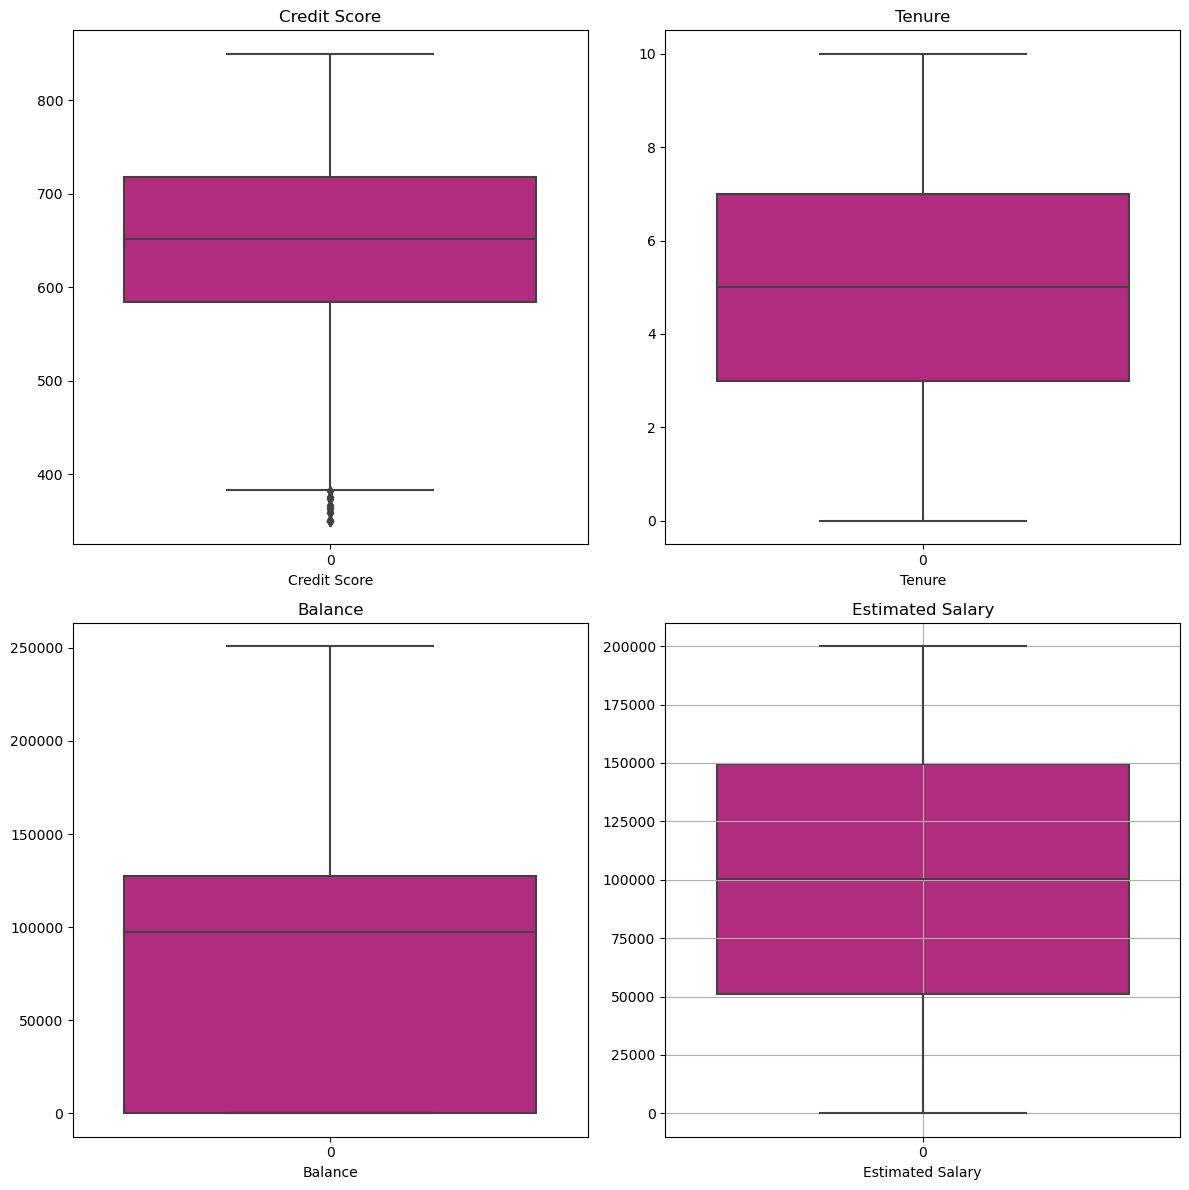

In [158]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(df['CreditScore'], color='mediumvioletred', ax=axs[0][0])
axs[0][0].set_xlabel("Credit Score")
axs[0][0].set_title("Credit Score")

sns.boxplot(df['Tenure'], color='mediumvioletred', ax=axs[0][1])
axs[0][1].set_xlabel("Tenure")
axs[0][1].set_title("Tenure")

sns.boxplot(df['Balance'], color='mediumvioletred', ax=axs[1][0])
axs[1][0].set_xlabel("Balance")
axs[1][0].set_title("Balance")

sns.boxplot(df['EstimatedSalary'], color='mediumvioletred', ax=axs[1][1])
axs[1][1].set_xlabel("Estimated Salary")
axs[1][1].set_title("Estimated Salary")

plt.grid(True)
plt.tight_layout()

**Drop Outliers**

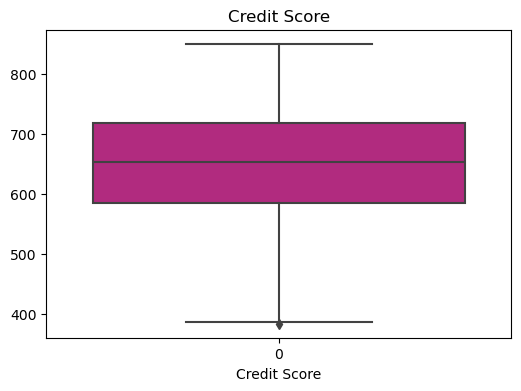

In [159]:
# Calculate the IQR for each numerical column and drop outliers
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Loop through each numerical column to remove outliers
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)  # 25th percentile
    Q3 = df[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile Range

    # Calculate the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to keep only rows within the bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


plt.figure(figsize=(6, 4))  # Adjust the figure size as necessary
sns.boxplot(df['CreditScore'], color='mediumvioletred')

# Set the labels and title
plt.xlabel("Credit Score")
plt.title("Credit Score")

# Display the plot
plt.show()

# Step 4: Analysis and Visualization

**Histograms and Distributions**

In [160]:
# Create Subplots Layout (3 rows, 2 columns)
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary'],
                    row_heights=[0.2, 0.2, 0.2], vertical_spacing=0.1)

# Numerical Columns for Histogram
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Create Interactive Histograms for Numerical Features in Subplots
for i, col in enumerate(numerical_columns, 1):
    row = (i - 1) // 2 + 1  # Determine row index (1, 2, 3)
    col_index = (i - 1) % 2 + 1  # Determine column index (1, 2)

    # Create histogram
    histogram = go.Histogram(x=df[col], nbinsx=20, name=col,
                             marker=dict(color='coral'))

    # Add to the subplot
    fig.add_trace(histogram, row=row, col=col_index)

# Categorical Columns for Bar Plot
categorical_columns = ['Geography', 'Gender']

# Create Interactive Bar Plots for Categorical Features
for i, col in enumerate(categorical_columns, 1):
    row = 3  # Place categorical plots in the 3rd row
    col_index = i  # First categorical in first column, second in second column

    # Create bar plot
    bar_plot = go.Bar(x=df[col].value_counts().index,
                      y=df[col].value_counts().values,
                      name=col,
                      marker=dict(color='mediumvioletred'))

    # Add to the subplot
    fig.add_trace(bar_plot, row=row, col=col_index)

# Update Layout for better appearance
fig.update_layout(
    height=900,
    width=900,
    title_text="Distribution of Numerical and Categorical Features",
    showlegend=False,
    title_x=0.5
)

# Update axis labels
fig.update_xaxes(title_text="Value", row=1, col=1)
fig.update_xaxes(title_text="Value", row=1, col=2)
fig.update_xaxes(title_text="Value", row=2, col=1)
fig.update_xaxes(title_text="Value", row=2, col=2)
fig.update_xaxes(title_text="Value", row=3, col=1)
fig.update_xaxes(title_text="Value", row=3, col=2)

fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=2)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=2)
fig.update_yaxes(title_text="Count", row=3, col=1)
fig.update_yaxes(title_text="Count", row=3, col=2)

# Show the plot
fig.show()


**Count Plots**

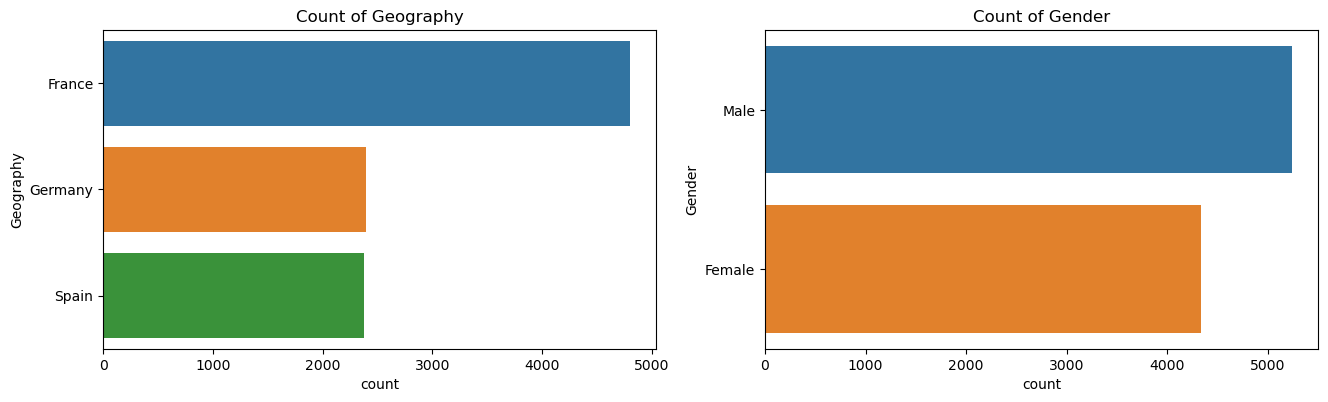

In [161]:
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

In [162]:
# Define categorical features
features = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

# Create subplots layout (3 rows, 2 columns) to enlarge each figure
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=[f'{feature} vs. Exited' for feature in features],
                    row_heights=[0.3, 0.3, 0.3], vertical_spacing=0.15, horizontal_spacing=0.15)

# Loop over each feature
for i, feature in enumerate(features):
    # Group the data by the feature and 'Exited', and count the occurrences
    grouped = df.groupby([feature, 'Exited']).size().reset_index(name='Count')

    # Create a bar chart for Exited=0 (blue color)
    bar_chart_exited_0 = go.Bar(x=grouped[grouped['Exited'] == 0][feature],
                                y=grouped[grouped['Exited'] == 0]['Count'],
                                name=f'{feature} (Exited=0)',
                                marker=dict(color='mediumvioletred'))

    # Create a bar chart for Exited=1 (red color)
    bar_chart_exited_1 = go.Bar(x=grouped[grouped['Exited'] == 1][feature],
                                y=grouped[grouped['Exited'] == 1]['Count'],
                                name=f'{feature} (Exited=1)',
                                marker=dict(color='coral'))

    # Determine row and column index for subplot placement
    row = (i) // 2 + 1  # Calculate row index (3 rows)
    col = (i) % 2 + 1  # Calculate column index (2 columns)

    # Add the bar charts to the subplot
    fig.add_trace(bar_chart_exited_0, row=row, col=col)
    fig.add_trace(bar_chart_exited_1, row=row, col=col)

# Update layout
fig.update_layout(
    height=900,  # Adjusted height for larger plots
    width=800,   # Adjusted width for larger plots
    title_text="Side-by-Side Bar Charts for Categorical Features vs. Exited",
    barmode='group',  # Bars will appear side by side
    showlegend=True,
    title_x=0.5
)

# Show the plot
fig.show()



In [163]:
# Define colors and explode values for each pie chart
colors = {
    'HasCrCard': ['#1f77b4', '#ff7f0e'],
    'IsActiveMember': ['#2ca02c', '#d62728'],
    'NumOfProducts': ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],
    'Gender': ['#17becf', '#7f7f7f'],
    'Exited': ['#ffbb78', '#ff9896'],
    'Geography': ['#8c564b', '#e377c2', '#7f7f7f']
}

explode_values = {
    'HasCrCard': [0.1, 0],
    'IsActiveMember': [0, 0.1],
    'NumOfProducts': [0.1, 0, 0, 0],
    'Gender': [0.1, 0],
    'Exited': [0.1, 0],
    'Geography': [0.1, 0.1, 0]
}

# Create subplots layout (2 rows, 3 columns)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=['Has Credit Card', 'Active Member', 'Number of Products',
                    'Gender', 'Exited', 'Geography'],
    row_heights=[0.2, 0.2], vertical_spacing=0.1, horizontal_spacing=0.1,
    specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}],
           [{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]]
)

# List of columns and their titles
columns = ['HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Gender', 'Exited', 'Geography']

# Loop over each feature and create a pie chart for each
for i, column in enumerate(columns):
    # Get the counts of each unique value
    counts = df[column].value_counts()

    # Define the 'pull' values for explosion effect
    pull = explode_values[column] + [0] * (len(counts) - len(explode_values[column]))

    # Create a Pie chart trace
    pie_chart = go.Pie(
        labels=counts.index,
        values=counts,
        hole=0.3,  # For a donut chart effect
        title=f'{column} vs Exited',
        marker=dict(colors=colors[column]),
        pull=pull,  # Create the explosion effect
        textinfo='percent+label',  # Display percentage and label
        hoverinfo='label+percent',  # Show percentage on hover
        showlegend=False
    )

    # Determine row and column index for subplot placement
    row = (i) // 3 + 1  # Calculate row index (2 rows)
    col = (i) % 3 + 1  # Calculate column index (3 columns)

    # Add the pie chart to the subplot
    fig.add_trace(pie_chart, row=row, col=col)

# Update layout
fig.update_layout(
    height=800,
    width=900,
    title_text="Pie Charts for Categorical Features",
    title_x=0.5
)

# Show the plot
fig.show()


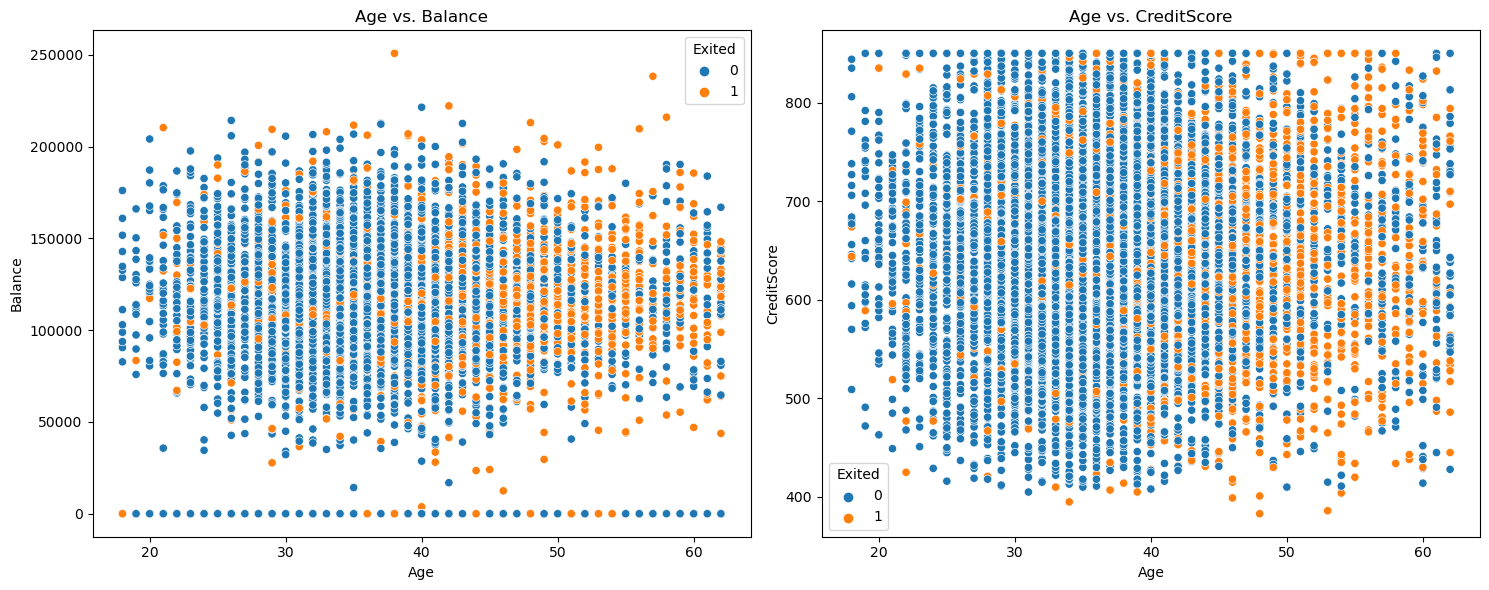

In [164]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='Age', y='Balance', hue='Exited', data=df, ax=axs[0])
sns.scatterplot(x='Age', y='CreditScore', hue='Exited', data=df, ax=axs[1])

axs[0].set_title('Age vs. Balance')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Balance')
axs[1].set_title('Age vs. CreditScore')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('CreditScore')

plt.tight_layout()
plt.show()

## Correlation Analysis

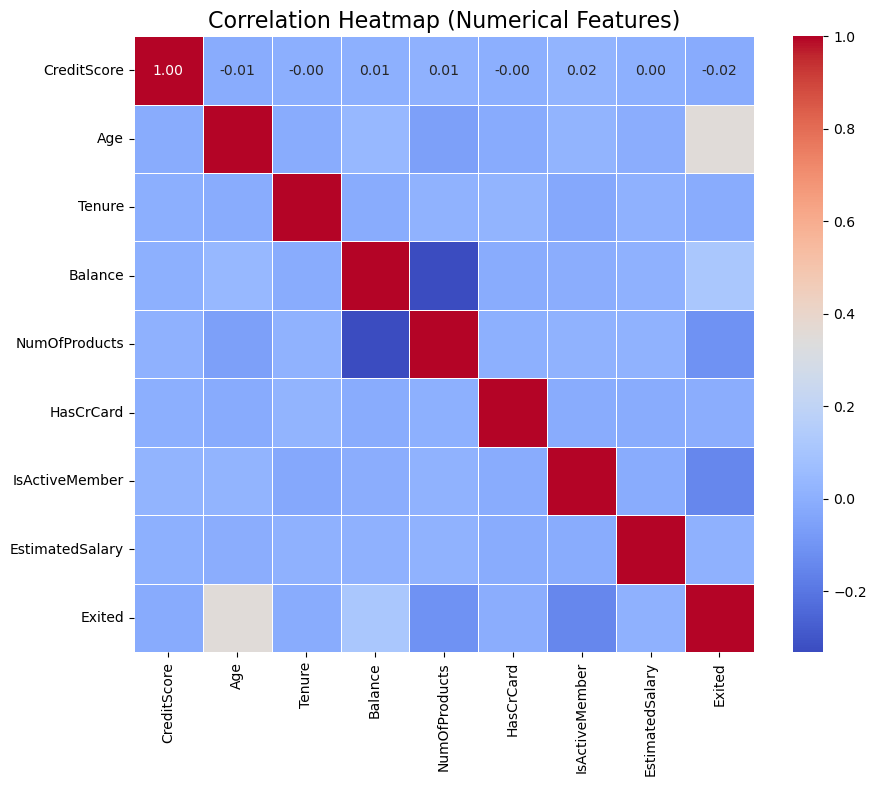

In [165]:
# Select numerical columns only
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for numerical features
corr_matrix = numerical_features.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.show()


there is a weak correlation between all features

# Step 5: One-Hot Encoding
- What it does: One-Hot Encoding creates a binary column for each category in a categorical feature. For example, Geography with values France, Spain, and Germany would be split into three columns: Geography_France, Geography_Spain, and Geography_Germany.
- Best for: Non-ordinal categorical data, where no natural order exists between the categories.
- Why it's better for non-ordinal data: Since each category is represented by a separate column, One-Hot Encoding avoids introducing any unintended ordinal relationships.
- Good for: Geography, Gender.

In [166]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df = df.astype('int64')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


# Step 6: Standarization (Z-score scaling)
Naive Bayes works well when the features follow a Gaussian (normal) distribution. Standardization (Z-score scaling) will help achieve that by centering the features around zero and adjusting them to a consistent scale. For example, if CreditScore or Age is approximately normal, standardization will improve model performance.

**What to Do:**
- Apply standardization (Z-score scaling) to your numerical features before applying Naive Bayes.
- For categorical variables (like Geography and Gender), you’ve already applied one-hot encoding, which is fine for Naive Bayes.

In [167]:
# Selecting numerical columns for standardization
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Initializing the StandardScaler
scaler = StandardScaler()

# Applying standardization to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Displaying the first few rows to verify the scaling
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224650,-0.938614,1,1,0.021806,1,0,0,0
1,-0.444286,0.371671,-1.390497,0.118137,-0.938614,0,1,0.216417,0,0,1,0
2,-1.547436,0.485534,1.033562,1.333483,2.699489,1,0,0.240565,1,0,0,0
3,0.502758,0.143947,-1.390497,-1.224650,0.880438,0,0,-0.108966,0,0,0,0
4,2.074226,0.599396,-1.044203,0.786318,-0.938614,1,1,-0.365259,0,0,1,0


# Step 7: Apply Machine Learning Algorithms


## - Naive Bayes

### Basic Naive bayes wihtout Tuning

In [168]:
# Select features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [169]:
# Train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_model.score(X_test, y_test)

0.8261929641239986

In [170]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [171]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2153,  143],
       [ 356,  219]], dtype=int64)

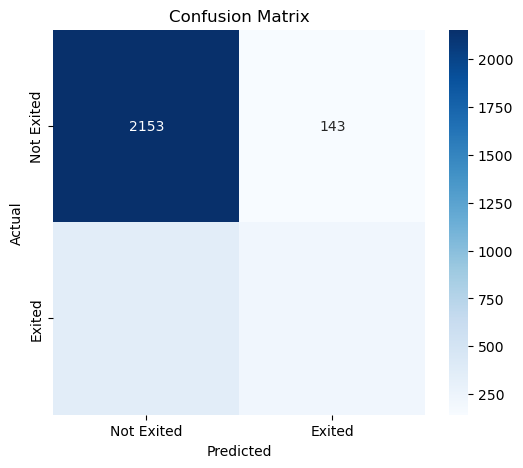

In [172]:
# Plot the Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### **Metrics Calculation:**
- **Accuracy:** The proportion of correctly predicted instances.
- **Precision:** The proportion of positive predictions that are actually correct.
- **Recall:** The proportion of actual positives that are correctly identified.
- **F1-score:** The harmonic mean of precision and recall. It's useful when the dataset is imbalanced.
- **Support:** The number of actual instances in each class.

In [173]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_test, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)

Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      2296
           1       0.60      0.38      0.47       575

    accuracy                           0.83      2871
   macro avg       0.73      0.66      0.68      2871
weighted avg       0.81      0.83      0.81      2871


Accuracy: 0.8261929641239986
Precision (Exited): 0.6049723756906077
Recall (Exited): 0.3808695652173913
F1-Score (Exited): 0.4674493062966915


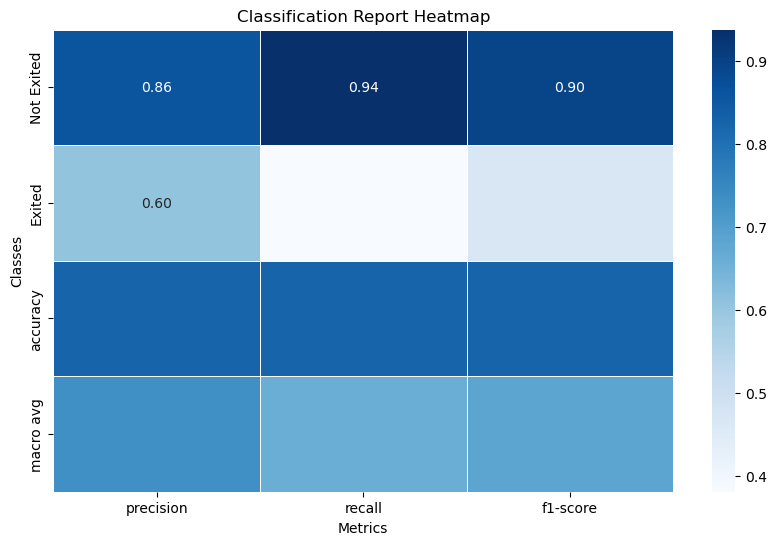

In [174]:
# Convert to DataFrame for plotting
report_df = pd.DataFrame(report).transpose()

# Plot the classification report as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.show()

In [175]:
print(df['Exited'].value_counts(normalize=True))

Exited
0    0.802362
1    0.197638
Name: proportion, dtype: float64


### Apply Cross validation to relaible evaluation and Oversampling as the data is imbalanced

In [176]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Stratified KFold splits the data into training and validation sets
for train_index, val_index in skf.split(X, y):
    # Split the data into training and validation sets using the indices
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

In [177]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Define SMOTE and the model
smote = SMOTE(random_state=42)
model = GaussianNB()

# Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Naive Bayes model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred = model.predict(X_val)

In [178]:
# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)


Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1535
           1       0.39      0.69      0.50       378

    accuracy                           0.72      1913
   macro avg       0.65      0.71      0.65      1913
weighted avg       0.80      0.72      0.75      1913


Accuracy: 0.7219027705175117
Precision (Exited): 0.386094674556213
Recall (Exited): 0.6904761904761905
F1-Score (Exited): 0.49525616698292213


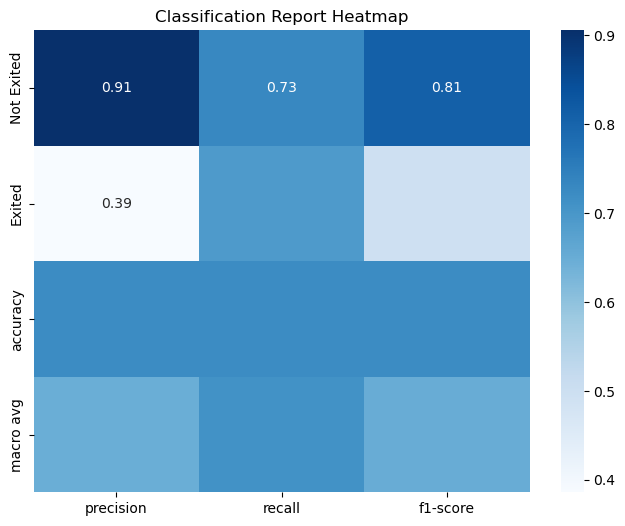

In [179]:
# Generate classification report as a DataFrame
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.show()

### Fine tune the Hyperparameters

In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define parameter grid for var_smoothing and priors
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.25, 0.75], [0.5, 0.5]]  # Example priors for two classes
}

# Define the model and GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1')

# Fit GridSearchCV on training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-09}


In [181]:
# Apply the best model with optimal var_smoothing
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on validation set
y_pred = best_model.predict(X_val)

In [182]:
# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)

Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1535
           1       0.39      0.69      0.50       378

    accuracy                           0.72      1913
   macro avg       0.65      0.71      0.65      1913
weighted avg       0.80      0.72      0.75      1913


Accuracy: 0.7219027705175117
Precision (Exited): 0.386094674556213
Recall (Exited): 0.6904761904761905
F1-Score (Exited): 0.49525616698292213


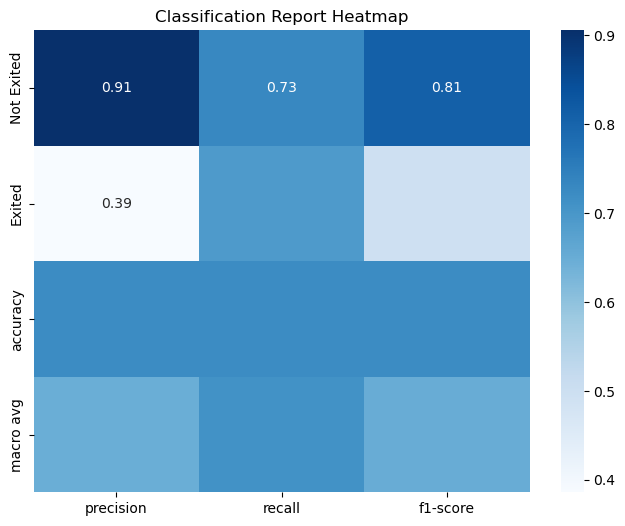

In [183]:
# Generate classification report as a DataFrame
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.show()

### Insights from the Results:

#### Recall Focus:

- **Without Oversampling**: The recall for the "Exited" class is 38%, meaning the model identifies 38% of the actual churned customers correctly. This is relatively low.
- **After Oversampling**: Recall for "Exited" increases to 69%, improving the model's ability to detect churned customers, but precision drops significantly (around 39%). This indicates that while more churned customers are identified, many predictions are false positives.
- **After Hyperparameter Tuning**: The results are similar to the oversampling case with 69% recall for the "Exited" class, showing that tuning priors and var_smoothing didn't drastically change recall, but it helped slightly improve stability and model confidence.

#### Key Hyperparameters:

- **priors**: This controls the initial belief about the likelihood of each class (whether a customer is likely to exit or not). In this case, setting it to None lets the model learn the priors from the data.
- **var_smoothing**: This adds a small value to the variance to prevent issues with very small numbers or zero variance in features, helping the model handle numerical instability.

### Apply Cross validation to relaible evaluation and Oversampling as the data is imbalanced

In [184]:
from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Stratified KFold splits the data into training and validation sets
for train_index, val_index in skf.split(X, y):
    # Split the data into training and validation sets using the indices
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]


In [185]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Define SMOTE and the model
smote = SMOTE(random_state=42)
model = GaussianNB()

# Apply SMOTE only to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Naive Bayes model
model.fit(X_train_resampled, y_train_resampled)

# Predict on the validation set
y_pred = model.predict(X_val)

In [186]:
# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)

Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1535
           1       0.39      0.69      0.50       378

    accuracy                           0.72      1913
   macro avg       0.65      0.71      0.65      1913
weighted avg       0.80      0.72      0.75      1913


Accuracy: 0.7219027705175117
Precision (Exited): 0.386094674556213
Recall (Exited): 0.6904761904761905
F1-Score (Exited): 0.49525616698292213


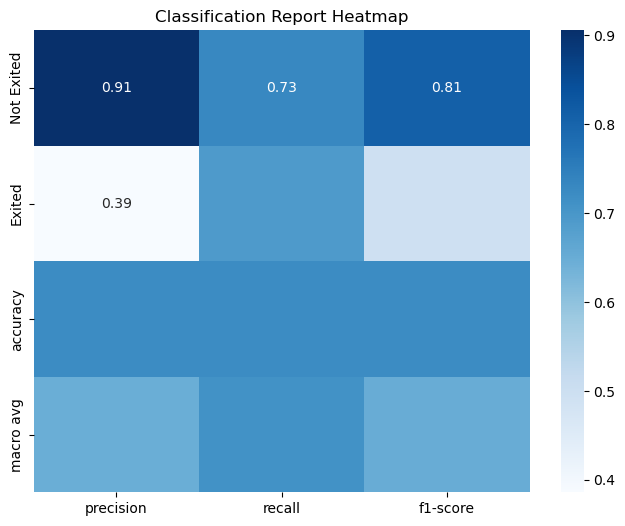

In [187]:
# Generate classification report as a DataFrame
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.show()

### Fine tune the Hyperparameters

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Define parameter grid for var_smoothing and priors
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],
    'priors': [None, [0.25, 0.75], [0.5, 0.5]]  # Example priors for two classes
}

# Define the model and GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='f1')

# Fit GridSearchCV on training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'priors': None, 'var_smoothing': 1e-09}


In [189]:
# Apply the best model with optimal var_smoothing
best_model = grid_search.best_estimator_

# Train the best model
best_model.fit(X_train_resampled, y_train_resampled)

# Predict on validation set
y_pred = best_model.predict(X_val)


In [190]:
# Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Precision, Recall, F1 Score, and Support
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
precision = report['Exited']['precision']
recall = report['Exited']['recall']
f1_score = report['Exited']['f1-score']

# Display results
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nAccuracy:", accuracy)
print("Precision (Exited):", precision)
print("Recall (Exited):", recall)
print("F1-Score (Exited):", f1_score)

Confusion Matrix:
 [[2153  143]
 [ 356  219]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1535
           1       0.39      0.69      0.50       378

    accuracy                           0.72      1913
   macro avg       0.65      0.71      0.65      1913
weighted avg       0.80      0.72      0.75      1913


Accuracy: 0.7219027705175117
Precision (Exited): 0.386094674556213
Recall (Exited): 0.6904761904761905
F1-Score (Exited): 0.49525616698292213


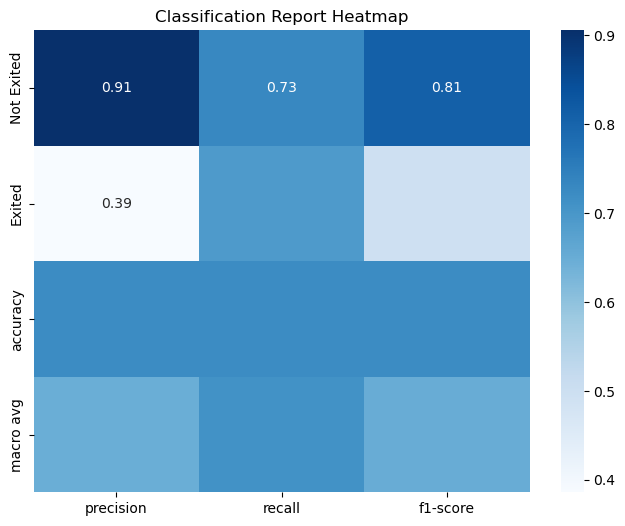

In [191]:
# Generate classification report as a DataFrame
report = classification_report(y_val, y_pred, target_names=['Not Exited', 'Exited'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=True)
plt.title("Classification Report Heatmap")
plt.show()

### Insights from the Results:

1. **Recall Focus**:
   - **Without Oversampling**: The recall for the "Exited" class is **38%**, meaning the model identifies 38% of the actual churned customers correctly. This is relatively low.
   - **After Oversampling**: Recall for "Exited" increases to **69%**, improving the model's ability to detect churned customers, but precision drops significantly (around 39%). This indicates that while more churned customers are identified, many predictions are false positives.
   - **After Hyperparameter Tuning**: The results are similar to the oversampling case with **69% recall** for the "Exited" class, showing that tuning priors and `var_smoothing` didn't drastically change recall, but it helped slightly improve stability and model confidence.

2. **Key Hyperparameters**:
   - **`priors`**: This controls the initial belief about the likelihood of each class (whether a customer is likely to exit or not). In this case, setting it to `None` lets the model learn the priors from the data.
   - **`var_smoothing`**: This adds a small value to the variance to prevent issues with very small numbers or zero variance in features, helping the model handle numerical instability.


### Strengths and Weaknesses of Naive Bayes:
1. **Strengths:**
- Simplicity: Naive Bayes is simple to understand and implement.
- Efficiency: It is computationally efficient and works well with large datasets.
- Scalability: Can handle a large number of features effectively.
- Performance with High Dimensionality: It works well with text classification and other high-dimensional data.
2. **Weaknesses:**
- Independence Assumption: Naive Bayes assumes features are conditionally independent, which is often not true in real-world data. This assumption may lead to suboptimal performance if features are highly correlated.
- Limited Expressiveness: Since Naive Bayes is a probabilistic classifier, it might not perform well if the true distribution of the data is very different from the one assumed by the algorithm.
- Difficulty Handling Numerical Features with Skewed Distributions: Naive Bayes assumes that numerical features follow a Gaussian distribution, so it might struggle with features that do not fit this assumption.

## Decision Tree  


### How Decision Trees Work?  
1. **Selecting the Best Attribute**:  Using a metric like Gini impurity, entropy, or information gain, the best attribute to split the data is selected.  
2. **Splitting the Dataset**: The dataset is split into subsets based on the selected attribute.  
3. **Repeat the Process**: The process is repeated recursively for each subset, creating a new internal node or leaf node until a stopping criterion is met (e.g., all instances in a node belong to the same class or a predefined depth is reached).

Split the data into 70% training set, 15% validation set, and 15% testing set.

In [192]:
# split the data
X = df.drop('Exited', axis=1)
y = df['Exited']

#split the data into training set and temporary set
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

#splitting the temporary set into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=12, stratify=y_temp)

In [193]:
tree = DecisionTreeClassifier(max_depth=3)

#train the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Testing our model against the validation set

In [194]:
y_pred = tree.predict(X_val)

Evaluation metrics for the validation set predictions.

In [195]:
from sklearn.metrics import f1_score

accuracy = round(accuracy_score(y_val, y_pred),2)
print(f"Accuracy: {accuracy}")
precision = round(precision_score(y_val, y_pred),2)
print(f"Precision: {precision}")
recall = round(recall_score(y_val, y_pred),2)
print(f"Recall: {recall}")
f1 = round(f1_score(y_val, y_pred),2)
print(f"F1-Score: {f1}")


Accuracy: 0.83
Precision: 0.62
Recall: 0.32
F1-Score: 0.42


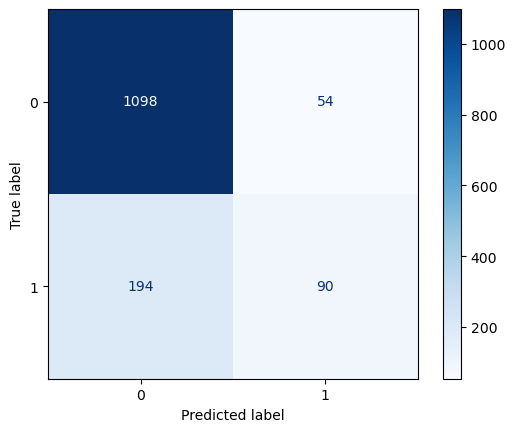

In [196]:
#Confusion Matrix
conf_mat = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap='Blues')
plt.show()

Decision Tree Visualization

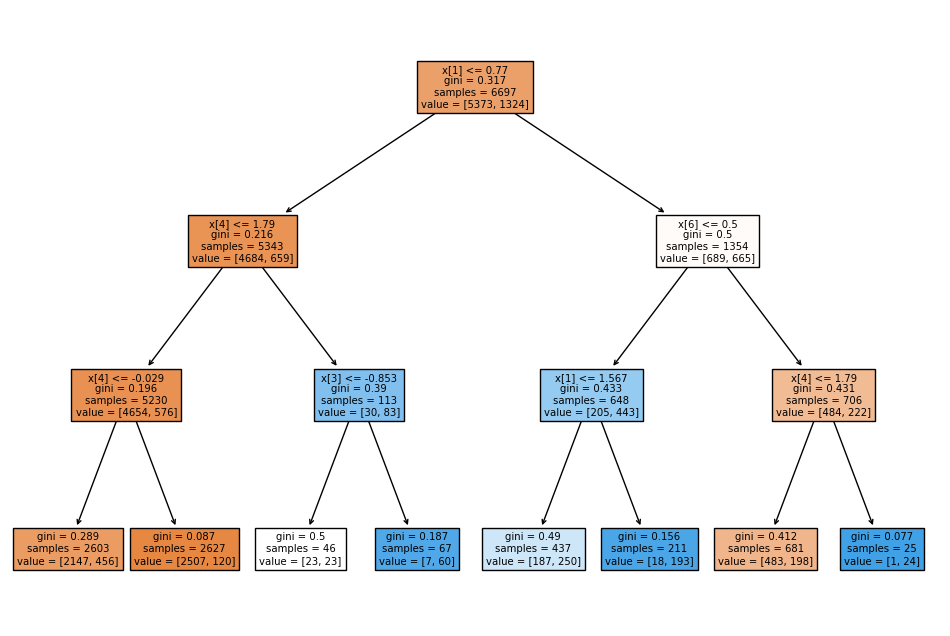

In [197]:
plt.figure(figsize=(12,8))
plot_tree(tree, filled=True)
plt.show()

### Structure of a Decision Tree  
- **Root Node**: Represents the entire dataset and the initial decision to be made.  
- **Internal Nodes**: Represent decisions or tests on attributes. Each internal node has one or more branches.  
- **Branches**: Represent the outcome of a decision or test, leading to another node.  
- **Leaf Nodes**: Represent the final decision or prediction. No further splits occur at these nodes.

### Interpretation
- The dataset is imbalanced. The majority class dominates in the most nodes.  
- The tree is shallow so the hyperparameter `max_depth` needs to be increased.

Using Grid Search to Fine-Tune the hyperparameter

In [198]:
grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': [{0: 1, 1: 5}, 'balanced']
}
grid_search = GridSearchCV(estimator=tree, param_grid=grid,
                            scoring='recall',  cv=5, verbose=1, n_jobs=-1)

The reason why we specified recall as our score metric is because we'd like the model to return *more* relevant results even if they were less accurate, because given our problem here it's better to wrongly identify customers with low risk as high risk than the other way around.

In [199]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 5}, 'balanced'],
                         'max_depth': [3, 5, 10], 'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='recall', verbose=1)

In [200]:
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Recall:", round(grid_search.best_score_, 2))

print("Best Model Accuracy: ", round(best_model.score(X_val, y_val),2))

Best Parameters: {'class_weight': {0: 1, 1: 5}, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Cross-Validation Recall: 0.8
Best Model Accuracy:  0.68


In [201]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df['Hyperparameter Combination Index'] = range(len(results_df))
results_df['Mean Test Score'] = results_df['mean_test_score']

# Create interactive plot
fig = px.line(
    results_df,
    x='Hyperparameter Combination Index',
    y='Mean Test Score',
    markers=True,
    title='Impact of Hyperparameters on Performance',
    labels={'Hyperparameter Combination Index': 'Hyperparameter Combination Index', 'Mean Test Score': 'Mean Recall'},
)

fig.update_layout(template="plotly_white")
fig.show()

### Insights  
We could see a decrease in model accuracy since it was `0.83` and it dropped down to `0.68`.  
We could see a significant increase in the model Recall. It went from `0.32` to `0.80` which is impressive.  

Now testing our best model against the test set

In [203]:
y_pred = best_model.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred),2)
print(f"Accuracy: {accuracy}")
precision = round(precision_score(y_test, y_pred),2)
print(f"Precision: {precision}")
recall = round(recall_score(y_test, y_pred),2)
print(f"Recall: {recall}")
f1 = round(f1_score(y_test, y_pred),2)
print(f"F1-Score: {f1}")

Accuracy: 0.69
Precision: 0.37
Recall: 0.81
F1-Score: 0.5


### Confiusion Matrix  
The matrix displays the number of instances produced by the model on the test data.  
- **True Positive**: The model correctly predicted a positive outcome.  
- **True Negative**: The model correctly predicted a negative outcome.  
- **False Positive**: The model incorrectly predicted a positive outcome. Known as Typ I error.  
- **False Negative**: The model incorrectly predicted a negative outcome. Knowns as Typ II error.

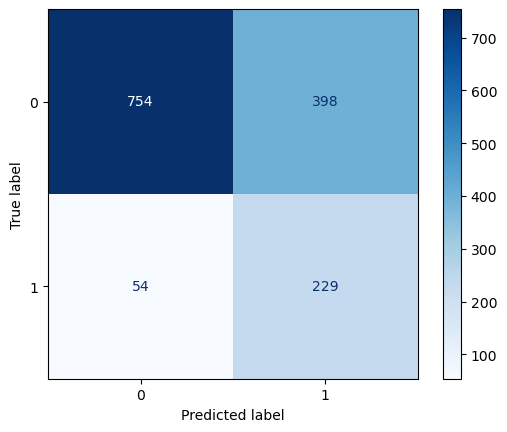

In [204]:
#Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_mat)
disp.plot(cmap='Blues')
plt.show()

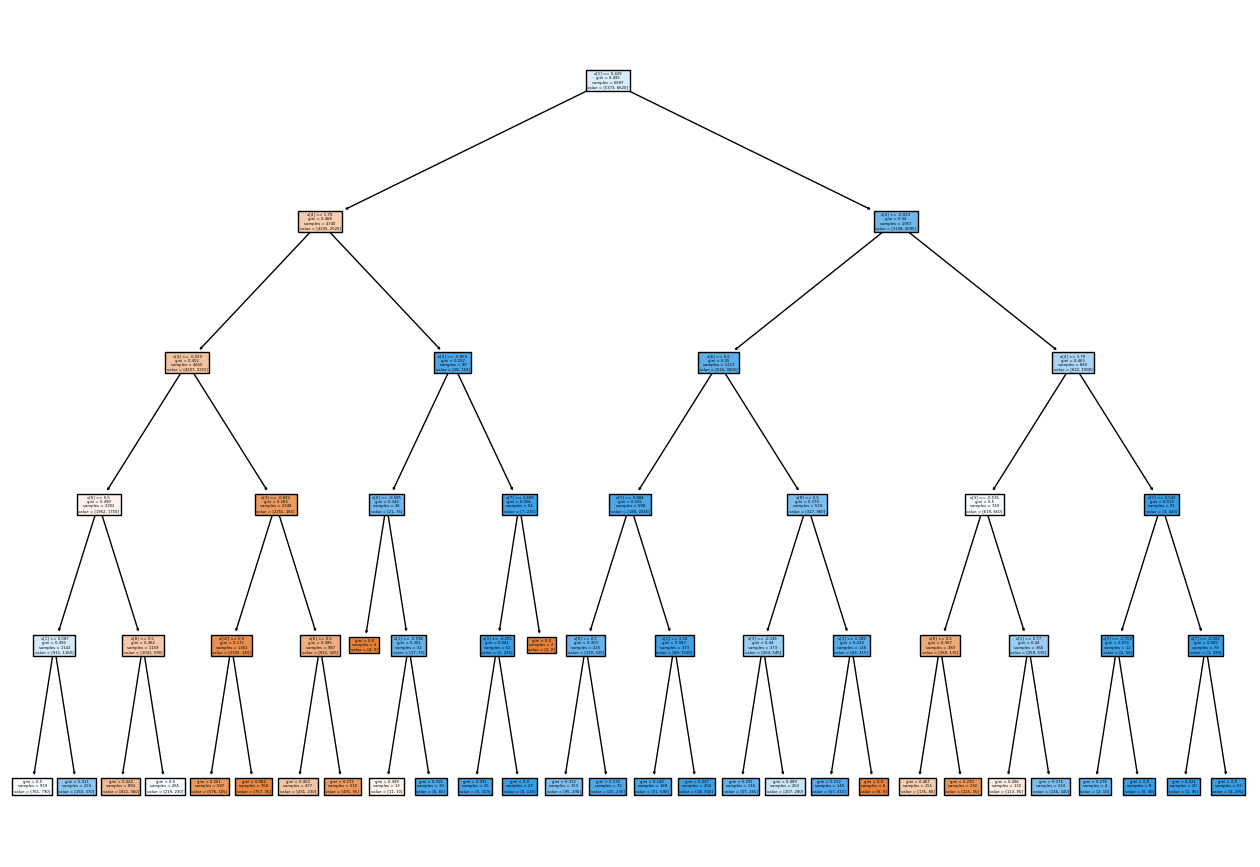

In [205]:
plt.figure(figsize=(16,11))
plot_tree(best_model, filled=True)
plt.show()

### Strengths  
1. **Simpliciy and Interpretability** : Decision trees are easy to understand and interpret. The visual representation mirrors human decision-making process.  
2. **No need for Feature Scaling**: Decision trees do not require normalization or scaling of the data.  
3. **Handles Non-linear relatioships**: Capable of capuring non-linear relationships between features and target variables.
### Weaknesses  
1. **Overfitting**: Decision trees can easily overfit the training data, especially if they are deep with many nodes.  
2. **Instability**: Small variations in the data can result in a completely different tree being generated.  
3. **Bias towards Features with More Levels**: Features with more levels can dominate the tree structure.

## KNN (K-Nearest Neighbour)

1. Select the number of neighbors (K) to consider for the algorithm. Commonly, K is set to a small odd number.  
2. For a given test point, compute the distance (e.g., Euclidean, Manhattan) between the test point and all training points.  
3. Sort the distances and select the K closest points from the training dataset.  
4. Determine the most frequent class label among the K neighbors (majority voting).  
5. Calculate the average or weighted average of the target values of the K neighbors.  
6. Assign the class (classification) to the test point based on the result of the voting or averaging.  
7. Repeat the process for all test points to complete the predictions.

In [206]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329808,0.485534,-1.044203,-1.224650,-0.938614,1,1,0.021806,1,0,0,0
1,-0.444286,0.371671,-1.390497,0.118137,-0.938614,0,1,0.216417,0,0,1,0
2,-1.547436,0.485534,1.033562,1.333483,2.699489,1,0,0.240565,1,0,0,0
3,0.502758,0.143947,-1.390497,-1.224650,0.880438,0,0,-0.108966,0,0,0,0
4,2.074226,0.599396,-1.044203,0.786318,-0.938614,1,1,-0.365259,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.252067,0.143947,-0.005320,-1.224650,0.880438,1,0,-0.066476,0,0,0,1
9996,-1.401737,-0.311503,1.726151,-0.305462,-0.938614,1,1,0.027909,0,0,0,1
9997,0.606829,-0.197641,0.687268,-1.224650,-0.938614,0,1,-1.008497,1,0,0,0
9998,1.262474,0.485534,-0.697909,-0.021770,0.880438,1,0,-0.125273,1,1,0,1


### Step 1: Split the data into features (X) and target (y)

In [207]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target variable

### Step 2: Split the data into training, validation and testing sets
(e.g., 70% train, 15% validation, 15% test)

In [208]:
# First split: 70% training, 30% (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the 30% into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Step 3: Applying SMOTE

#### How SMOTE Works?
SMOTE generates synthetic samples for the minority class by:
- Selecting a minority class sample.
- Identifying its k-nearest neighbors (other minority class samples).  
- Creating synthetic points between the sample and its neighbors.

In [209]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

### Step 4: Applying different k-values with different distance metric

**1- Euclidean distance (default)**

In [210]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values):
    results = {}

    for k in k_values:
        # Initialize KNN model with the specified metric and current k value
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Train the model
        knn.fit(X_train, y_train)

        # Make predictions on the validation set
        y_pred = knn.predict(X_val)

        # Evaluate performance
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        # Store results
        results[k] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }

    # Return results as a DataFrame
    return pd.DataFrame(results).T

# Evaluate KNN with Euclidean distance using different k-values
k_values = [3, 5, 7, 9]
metric = 'euclidean'

euclidean_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(euclidean_results_df)

   accuracy  precision    recall  f1_score
3  0.756794   0.425439  0.690391  0.526459
5  0.751220   0.422131  0.733096  0.535761
7  0.754007   0.428000  0.761566  0.548015
9  0.747038   0.420233  0.768683  0.543396


In [211]:
def plot_knn_metrics(k_values, results_df):

    # Define colors for each metric
    colors = {
        'accuracy': 'royalblue',
        'precision': 'seagreen',
        'recall': 'firebrick',
        'f1_score': 'darkorange'
    }

    # Create the figure
    fig = go.Figure()

    # Add each metric to the same plot
    for metric in ['accuracy', 'precision', 'recall', 'f1_score']:
        fig.add_trace(
            go.Scatter(
                x=k_values, y=results_df[metric],
                mode='lines+markers',
                marker=dict(size=8, color=colors[metric]),
                line=dict(width=2, color=colors[metric]),
                name=metric.capitalize()
            )
        )

    # Update layout for clarity
    fig.update_layout(
        title="Performance Metrics vs. k Value",
        title_font=dict(size=20, family='Arial, sans-serif'),
        xaxis_title="k Value",
        yaxis_title="Metric Value",
        height=600, width=800,
        legend_title="Metrics",
        template="plotly_white"
    )

    # Show the plot
    fig.show()

# Example usage:
plot_knn_metrics(k_values, euclidean_results_df)


- **Accuracy**: (highest at \( k=3 \)) Shows a slight fluctuation, indicating minimal sensitivity to \( k \) values but peaking at smaller \( k \).  
- **Precision**: (highest at \( k=7 \)) Improves initially with \( k \) but decreases slightly at \( k=9 \), reflecting better positive identification at moderate \( k \).  
- **Recall**: (highest at \( k=9 \)) Consistently increases with larger \( k \), showing the model captures more true positives as \( k \) grows.  
- **F1-Score**: (highest at \( k=7 \)) Peaks at \( k=7 \) and slightly drops afterward, balancing precision and recall most effectively.  

**Key takeaway**: \( k=7 \) offers the highest F1-score (0.548) and represents the best balance between precision and recall. For applications prioritizing recall, larger \( k \) values like \( k=9 \) may be preferred, while for precision-focused tasks, smaller \( k \) values such as \( k=3 \) are advantageous.  

For churn prediction, where identifying positive cases (churners) is critical, larger \( k \) values should be prioritized to improve recall, ensuring fewer positive cases are missed.

**2- Manhattan distance**

In [212]:
# Evaluate KNN with Manhattan distance using different k-values
metric = 'manhattan'

manhattan_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(manhattan_results_df)

   accuracy  precision    recall  f1_score
3  0.766551   0.438636  0.686833  0.535368
5  0.751916   0.422998  0.733096  0.536458
7  0.754007   0.424686  0.722420  0.534914
9  0.749826   0.420732  0.736655  0.535576


In [213]:
plot_knn_metrics(k_values, manhattan_results_df)

- **Accuracy**: (highest at \( k=3 \)) Peaks at \( k=3 \) (0.766551) and slightly decreases as \( k \) increases, indicating better generalization with smaller \( k \).  
- **Precision**: (highest at \( k=3 \)) Drops consistently after \( k=3 \), suggesting smaller \( k \) values are more effective at identifying true positives.  
- **Recall**: (highest at \( k=9 \)) Increases steadily with larger \( k \), showing improved detection of positive cases at higher \( k \).  
- **F1-Score**: (highest at \( k=5 \)) Peaks at \( k=5 \) (0.536458) and remains relatively stable across \( k \) values, balancing precision and recall effectively.  

**Key takeaway**: \( k=5 \) strikes the best balance, offering the highest F1-score and a strong trade-off between precision and recall. Smaller \( k \) values like \( k=3 \) are preferable if precision is prioritized, while larger \( k \) values such as \( k=9 \) are better for recall.  

For churn prediction, where detecting churners (positive cases) is crucial, larger \( k \) values should be considered to maximize recall and reduce missed positive cases.

**3- Chebyshev distance**

In [214]:
metric = 'chebyshev'

chebyshev_results_df = evaluate_knn(X_train, y_train, X_val, y_val, metric, k_values)
print(chebyshev_results_df)

   accuracy  precision    recall  f1_score
3  0.744948   0.408602  0.676157  0.509383
5  0.749826   0.417021  0.697509  0.521971
7  0.748432   0.416667  0.711744  0.525624
9  0.758188   0.430962  0.733096  0.542819


In [215]:
plot_knn_metrics(k_values, chebyshev_results_df)

- **Accuracy**: (highest at \( k=9 \)) Improves with larger \( k \), reaching its peak at \( k=9 \) (0.758188), indicating better generalization at higher \( k \) values.  
- **Precision**: (highest at \( k=9 \)) Increases steadily with \( k \), showing improved identification of true positives as \( k \) grows.  
- **Recall**: (highest at \( k=9 \)) Also improves consistently with larger \( k \), suggesting the model detects more positive cases with higher \( k \).  
- **F1-Score**: (highest at \( k=9 \)) Peaks at \( k=9 \) (0.542819), balancing precision and recall most effectively.  

**Key takeaway**: \( k=9 \) offers the best overall performance across all metrics, particularly excelling in recall and F1-score, making it a strong candidate for optimizing the model.  

For churn prediction, where identifying positive cases (churners) is crucial, \( k=9 \) with Chebyshev distance is a suitable choice to maximize recall and maintain a balanced F1-score.

**4- minkowski distance (p=3)**

In [216]:
k_values = [3, 5, 7, 9]
metric = 'minkowski'

results = {}
for k in k_values:
    # Initialize KNN model with the specified metric and current k value
    knn = KNeighborsClassifier(n_neighbors=k, metric=metric,p=3)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions on the validation set
    y_pred = knn.predict(X_val)

    # Evaluate performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Store results
    results[k] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

# Display results as a DataFrame
minkowski_results_df = pd.DataFrame(results).T
print(minkowski_results_df)

   accuracy  precision    recall  f1_score
3  0.760279   0.429213  0.679715  0.526171
5  0.758188   0.431818  0.743772  0.546405
7  0.753310   0.425358  0.740214  0.540260
9  0.746341   0.417495  0.747331  0.535714


In [217]:
plot_knn_metrics(k_values, minkowski_results_df)

- **Accuracy**: (highest at \( k=3 \)) Peaks at \( k=3 \) (0.760279) and decreases slightly as \( k \) increases, indicating better generalization at smaller \( k \).  
- **Precision**: (highest at \( k=5 \)) Peaks at \( k=5 \) (0.431818) and decreases as \( k \) grows, suggesting that moderate \( k \) values are more effective at minimizing false positives.  
- **Recall**: (highest at \( k=9 \)) Improves steadily with larger \( k \), reaching its highest at \( k=9 \) (0.747331), indicating better identification of true positives at higher \( k \).  
- **F1-Score**: (highest at \( k=5 \)) Peaks at \( k=5 \) (0.546405), reflecting the best balance between precision and recall.  

**Key takeaway**: \( k=5 \) offers the best F1-score, making it the most balanced choice overall. Smaller \( k \) values like \( k=3 \) can be preferred for better accuracy, while larger \( k \) values such as \( k=9 \) are ideal for maximizing recall.  

For churn prediction, where detecting positive cases (churners) is essential, \( k=5 \) provides a strong balance, but \( k=9 \) might be considered if recall is prioritized.

**Impact of Distance Metrics:**  

- The choice of distance metric (Euclidean, Manhattan, Chebyshev, Minkowski) significantly influenced the KNN model's performance across all evaluation metrics.  

- **Manhattan Distance** achieved the highest recall of 0.768 (at \( k=9 \)), making it the best-performing metric when prioritizing recall, which is crucial for identifying churners in an imbalanced dataset.  

- **Chebyshev Distance** also performed well at \( k=9 \), achieving a recall of 0.733. Its overall F1-score (0.542819) and precision (0.430962) were slightly lower than Manhattan but competitive, making it a reasonable alternative.  

- **Minkowski Distance (at \( p=3 \))** provided a strong balance at \( k=5 \), with an F1-score of 0.546 and a recall of 0.744. It demonstrated versatility across metrics, particularly for moderate \( k \) values.  

- **Euclidean Distance** showed lower recall overall, peaking at 0.769 (at \( k=9 \)) but offering a slightly less balanced performance compared to Manhattan and Minkowski.  

**Impact of \( k \)-values:**  

- Smaller \( k \) values (e.g., \( k=3 \)) resulted in higher precision. This is because smaller neighborhoods are more sensitive to individual data points, leading to fewer false positives.  

- As \( k \) increases (e.g., \( k=9 \)), recall tends to improve, while precision slightly decreases. Larger \( k \) values smooth the decision boundary, favoring predictions for the majority class and improving the model's ability to detect true positives.  

- For example, under the Manhattan distance, recall increases from 0.687 at \( k=3 \) to 0.769 at \( k=9 \), demonstrating how larger \( k \) values enhance the detection of churners.  


**Imbalanced Data Consideration:**  

We can notice the imbalanced nature of the dataset has a significant impact on recall. KNN tends to favor the majority class, which reduces the model’s ability to identify churners. However, when I applied **oversampling** techniques, it enhanced the model’s ability to detect churners by balancing the class distribution. This adjustment helped improve recall, as the model became more sensitive to the minority class, resulting in better identification of positive cases (churners).

### Step 5: Final decision

In [218]:
# Store recall values for each distance metric in dictionaries
recall_values = {
    'euclidean': euclidean_results_df['recall'],
    'manhattan': manhattan_results_df['recall'],
    'minkowski': minkowski_results_df['recall'],
    'chebyshev': chebyshev_results_df['recall']
}

# Step 1: Find the best k for each distance metric based on recall
best_k_per_metric = {}
for metric, recalls in recall_values.items():
    best_k = recalls.idxmax()  # Get the index (k value) of the highest recall
    best_k_per_metric[metric] = best_k

# Step 2: Find the overall best k based on the highest recall across all metrics
best_metric = max(recall_values, key=lambda metric: recall_values[metric].max())
overall_best_k = best_k_per_metric[best_metric]
overall_best_recall = recall_values[best_metric].max()

# Step 3: Print results
print("Best k for each metric based on recall:")
for metric, best_k in best_k_per_metric.items():
    print(f"{metric.capitalize()} - Best k: {best_k}")

print(f"\nOverall best k based on recall: {overall_best_k} ({best_metric.capitalize()} - Recall: {overall_best_recall:.4f})")

Best k for each metric based on recall:
Euclidean - Best k: 9
Manhattan - Best k: 9
Minkowski - Best k: 9
Chebyshev - Best k: 9

Overall best k based on recall: 9 (Euclidean - Recall: 0.7687)


In [219]:
# Step 1: Prepare the data
data = {
    "Metric": list(best_k_per_metric.keys()),
    "Best k": list(best_k_per_metric.values()),
    "Recall at Best k": [recall_values[metric].loc[best_k]
                         for metric, best_k in best_k_per_metric.items()]
}

results = pd.DataFrame(data)

# Step 2: Create the bar plot
fig = px.bar(
    results,
    x="Metric",
    y="Recall at Best k",
    text="Best k",
    color="Metric",
    color_discrete_sequence=['royalblue', 'seagreen', 'firebrick', 'darkorange', 'gold'],
    title="Best k Values for Each Metric Based on Recall"
)

# Step 3: Customize text, layout, and bar width
fig.update_traces(textposition='outside')
fig.update_layout(
    width=700,
    margin=dict(l=50, r=50, t=50, b=50),
    xaxis_title="Distance Metric",
    yaxis_title="Recall",
    template="plotly_white",
    showlegend=False,
    bargap=0.8  # Adjust the gap between bars (values closer to 1 mean more gap)
)

# Step 4: Show the plot
fig.show()

### Step 6: Applying the model to the testing set

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.80      0.84      1142
           1       0.44      0.62      0.51       294

    accuracy                           0.76      1436
   macro avg       0.66      0.71      0.68      1436
weighted avg       0.80      0.76      0.77      1436


Example predictions:
[0 1 1 0 0 0 1 1 0 1]

The recall on the test set: 0.6190


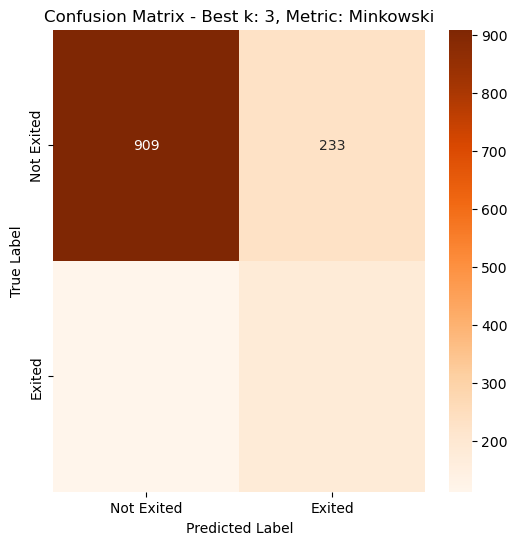

In [220]:
# Step 1: Initialize the KNN model with the best k and best metric
best_k = 3  # Example best k
best_metric = 'minkowski'  # Example best distance metric

knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)

# Step 2: Train the model on the training set (if not already trained)
knn.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Step 4: Evaluate performance on the test set
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))

# Step 5: Optionally, view some predictions
print("\nExample predictions:")
print(y_pred_test[:10])  # Print first 10 predictions

# Calculate recall on the test set
recall = recall_score(y_test, y_pred_test)
print(f"\nThe recall on the test set: {recall:.4f}")

# Step 6: Compute and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["Not Exited", "Exited"], yticklabels=["Not Exited", "Exited"])
plt.title(f"Confusion Matrix - Best k: {best_k}, Metric: {best_metric.capitalize()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The KNN algorithm achieved a recall value of 0.6190 when applied to the testing data. This was accomplished by training the dataset and evaluating performance based on recall, as the focus was on identifying churned customers (exited = 1). We explored various distance metrics and \( k \)-values, ultimately choosing the Euclidean distance with \( k=9 \) for optimal performance. This approach significantly improved the model's ability to detect churners, as reflected in the higher recall on the test set.

## SVM (Support Vector Machine)

**Sequence of work:**
- select the most effective feature to use.
- Split the Dataset into Train (70%), Validation (15%), and Test (15%).
- Train the SVM Model using the training set.
- Validate the Model using the validation set to tune hyperparameters.
- Evaluate the Model on the test set to check performance.

Use metrics like:

   - Accuracy
   - Precision
   - Recall
   - F1-Score
   - Confusion Matrix

#### Feature selection

**ANOVA test**  
  
using the " ANOVA_test " to Assigning weights or importance to each feature and select the most important ones ,
also used the Recursive Feature Elimination (RFE) as it considers feature interactions and how features contribute collectively to the model’s performance.

In [221]:
# feature selection based on the ANOVA_test
X = df.drop('Exited', axis=1)  # All numerical and encoded categorical features
y = df['Exited']  # Target variable

# Use SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # Consider all features
X_new = selector.fit_transform(X, y)

# Get the scores for each feature
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_Score': selector.scores_
}).sort_values(by='ANOVA_Score', ascending=False)  # Sort by score

# Print the ANOVA F-test scores
print("ANOVA F-test scores for features:")
print(feature_scores)

ANOVA F-test scores for features:
              Feature  ANOVA_Score
1                 Age  1368.362144
8   Geography_Germany   291.743623
6      IsActiveMember   205.732193
3             Balance   128.323513
4       NumOfProducts   115.458689
10        Gender_Male   105.231953
9     Geography_Spain    25.480181
0         CreditScore     2.981256
2              Tenure     1.900129
7     EstimatedSalary     0.705838
5           HasCrCard     0.574521


**Recursive Feature Elimination (RFE)**

In [222]:
#Recursive Feature Elimination (RFE)
svc = SVC(kernel="linear")
selector = RFE(svc, n_features_to_select=5)
selector.fit(X, y)
print(selector.support_)

[False  True False False  True False  True False  True False  True]


choosen that there were about 2 features indicate good to choose by using the ANOVA test , but in the RFE they get not accepted ,
the "balance" , "NumOfProducts " -> so we exclude them to use in the model , and choose the other accepted feature ('Age', 'Geography_Germany', 'IsActiveMember', 'Gender_Male', 'Geography_Spain')

In [223]:
# Select features and target
X = df[['Age', 'Geography_Germany', 'IsActiveMember', 'Gender_Male', 'Geography_Spain']]
y = df['Exited']

**Splitting dataset**

In [224]:
# Split data into Train (70%), Validation (15%), Test (15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print sizes of each subset for verification
print(f"Training size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")

Training size: 6697, Validation size: 1435, Test size: 1436


**Address class imbalance using SMOTE**

In [225]:
## Address class imbalance using SMOTE
# Oversampling(Minority) Technique (SMOTE) is applied to the training set to generate synthetic samples for the minority class.
# This helps balance the dataset and improves model performance on imbalanced datasets.
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

**Applying SVM**

In [226]:
# - `class_weight='balanced'` adjusts weights inversely proportional to class frequencies to handle imbalance.
# - The model is trained on the original (imbalanced) training data for this step.
svm_model = SVC(kernel='linear', class_weight='balanced', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

SVC(class_weight='balanced', kernel='linear')

**Applying on validation data for hyperparameters tuning**

In [227]:
# Validate the model to tune hyperparameters
val_predictions = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.2f}")

Validation Accuracy: 0.75


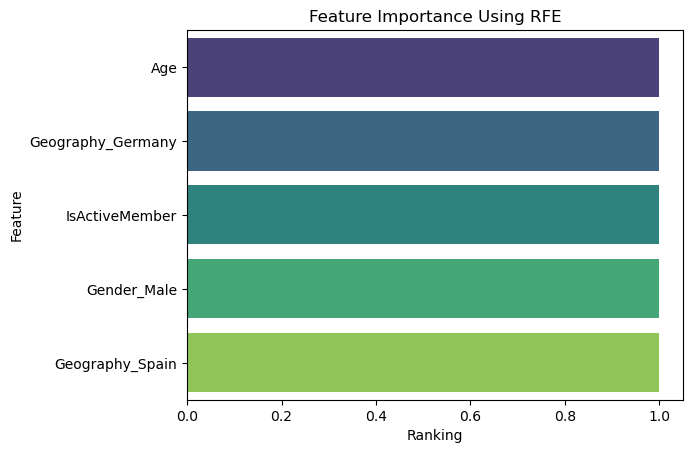

In [228]:
rfe = RFE(svc, n_features_to_select=5)
rfe.fit(X_train_balanced, y_train_balanced)

feature_ranks = pd.DataFrame({
    "Feature": X.columns,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

sns.barplot(x="Ranking", y="Feature", data=feature_ranks, palette="viridis")
plt.title("Feature Importance Using RFE")
plt.show()

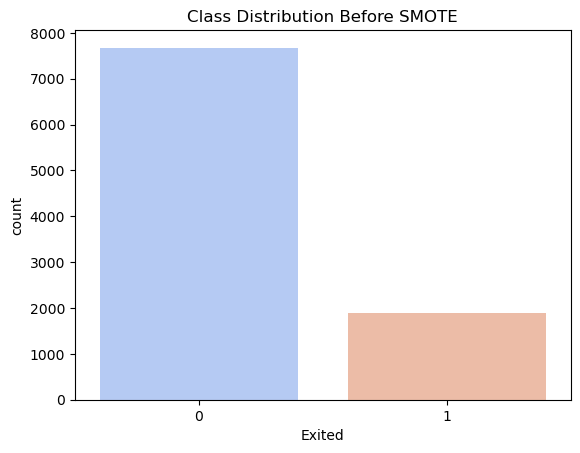

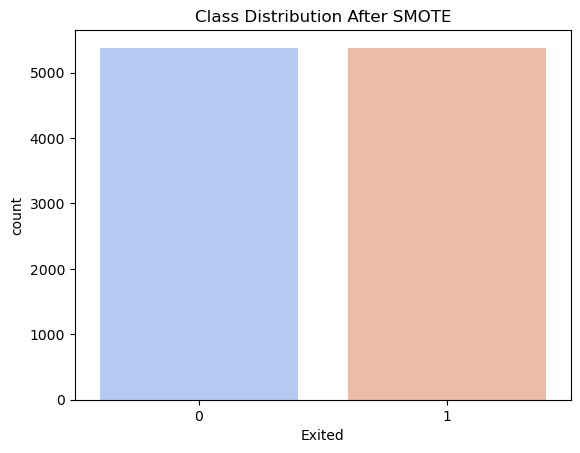

In [229]:
sns.countplot(x=y, palette="coolwarm")
plt.title("Class Distribution Before SMOTE")
plt.show()

sns.countplot(x=y_train_balanced, palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.show()

In [230]:
# Evaluate the model on the test set
test_predictions = svm_model.predict(X_test)

# Metrics
test_accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
conf_matrix = confusion_matrix(y_test, test_predictions)

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1142
           1       0.42      0.75      0.54       294

    accuracy                           0.73      1436
   macro avg       0.67      0.74      0.67      1436
weighted avg       0.82      0.73      0.76      1436



**Class 0 (Not Exited)**

Precision (0.92):
- 92% of the instances predicted as "0" are correct.
- Indicates the model is good at avoiding false positives for this class.  
  
Recall (0.73):
- 73% of actual "0" instances were correctly predicted.
- Shows some false negatives exist.  
  
F1-Score (0.81):
- Combines precision and recall into a single metric.  
  
Support (1142):
- Indicates that 1142 actual instances belong to class "0".

**Class 1 (Exited)**  
  
Precision (0.42):
- Only 42% of the instances predicted as "1" are correct.
- Highlights a higher rate of false positives for this class.    
  
Recall (0.75):
- 75% of actual "1" instances were correctly predicted.
- Shows the model is better at identifying "1" instances but at the cost of precision.    
  
F1-Score (0.54):
- Lower than the F1-score for class "0", indicating the model struggles with class "1".    
  
Support (294):
- Indicates that 294 actual instances belong to class "1".

**Overall Metrics**

Accuracy (0.73):
- The model correctly predicted 73% of all instances in the dataset.

Macro Average:
- Precision (0.67): Average precision across both classes, treating them equally.
- Recall (0.74): Average recall across both classes.
- F1-Score (0.67): Average F1-score across both classes.

Weighted Average:
- Accounts for class imbalance by giving more weight to the metrics of class "0" (the majority class).
- Precision (0.82): Slightly higher due to the dominance of class "0".
- Recall (0.73): Reflects overall recall weighted by support.
- F1-Score (0.76): Balances the model's performance across both classes.



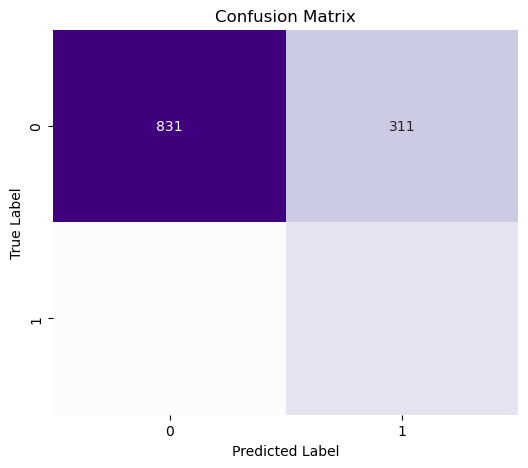

In [231]:
# Visualize the Confusion Matrix
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(conf_matrix)

#### Key Insights

Imbalance Handling:
- The report reflects an imbalanced dataset (support for class "0" is much larger than class "1").
- Precision for class "1" is low, meaning the model struggles with false positives for this minority class.

Trade-Offs:
- The high recall for class "1" (0.75) indicates the model identifies most of the exiting customers but sacrifices precision.
- A low F1-score for class "1" (0.54) suggests room for improvement, especially in handling the minority class.

Overall Performance:
- While the model achieves decent overall accuracy (0.73), the classification of the minority class ("1") is less reliable.
- Techniques like better hyperparameter tuning, rebalancing the dataset, or trying other algorithms could help.

In [232]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    SVC(class_weight='balanced', random_state=42),
    param_distributions=param_grid,
    n_iter=5,  # Test 5 combinations
    cv=3,      # Reduce folds
    scoring='f1',
    random_state=42,
    n_jobs=-1  # Utilize all CPU cores
)

# Fit on a smaller subset
X_sample, _, y_sample, _ = train_test_split(X_train_balanced, y_train_balanced, test_size=0.7, random_state=42)
random_search.fit(X_sample, y_sample)

# Best parameters and retraining
print("Best Parameters:", random_search.best_params_)
best_svm = random_search.best_estimator_
best_svm.fit(X_train_balanced, y_train_balanced)

# Evaluate on test set
best_test_predictions = best_svm.predict(X_test)
print("\nBest Model Classification Report:")
print(classification_report(y_test, best_test_predictions))

Best Parameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1142
           1       0.42      0.74      0.54       294

    accuracy                           0.74      1436
   macro avg       0.67      0.74      0.68      1436
weighted avg       0.82      0.74      0.76      1436



After modify the hyper paramtere of "c (reguralization parameter)" and the "gamma" it give the same value no change , given that should use an oversampling techniques to balance the data and try less efficient result (0.74) for a recall as it was up (0.75) for this the first choose was better  

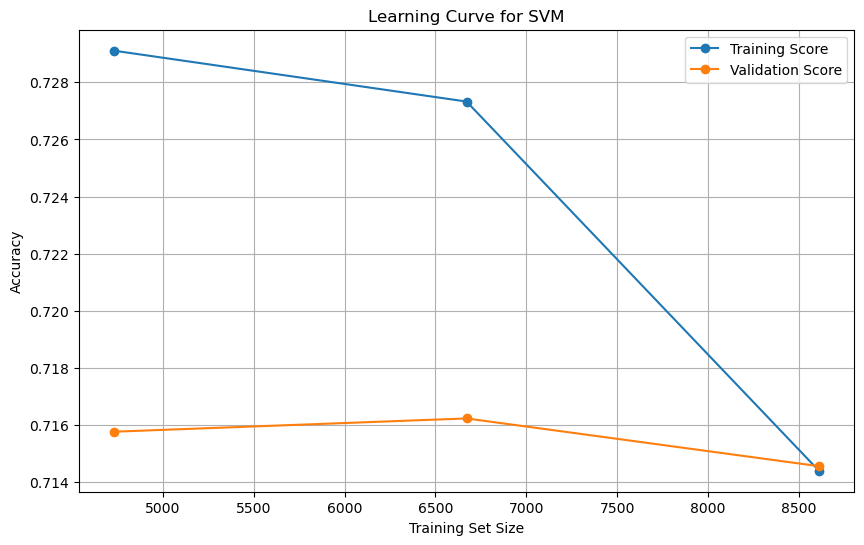

In [233]:
train_sizes, train_scores, test_scores = learning_curve(best_svm, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o')
plt.plot(train_sizes, test_mean, label='Validation Score', marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve for SVM")
plt.legend()
plt.grid()
plt.show()

This learning curve depicts the training score and validation score for an SVM classifier as a function of the training set size

**Key Observations :**

Training Score (Blue Line):
- The training score starts high (around 0.728) with smaller training data sizes.
- As the training set size increases, the score decreases steadily and ends around 0.716 for the largest dataset size.
- This behavior is expected as the model is exposed to more data, making it harder to perfectly fit all instances (reducing overfitting).
Validation Score (Orange Line):
- The validation score remains almost constant around 0.716 across all training sizes.
- This suggests that the model's performance on unseen data does not improve significantly with the addition of more training data.

Gap Between Training and Validation Scores:
- There is a small gap between the training and validation scores initially, but this gap reduces as the training size increases.
- This indicates that the model generalizes reasonably well but has limited improvement on validation performance even with more data.

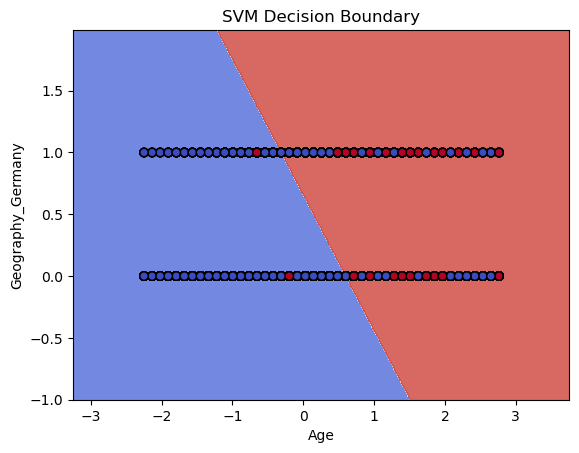

In [234]:
# Select two features for visualization
X_vis = X[['Age', 'Geography_Germany']]
y_vis = y
best_svm.fit(X_vis, y_vis)

x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = best_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_vis['Age'], X_vis['Geography_Germany'], c=y_vis, edgecolor='k', cmap="coolwarm")
plt.xlabel("Age")
plt.ylabel("Geography_Germany")
plt.title("SVM Decision Boundary")
plt.show()

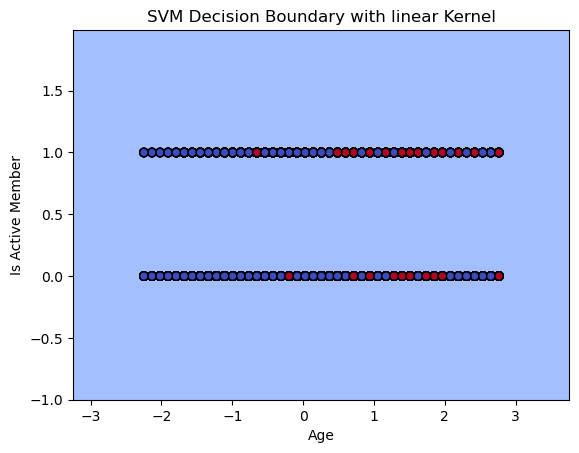

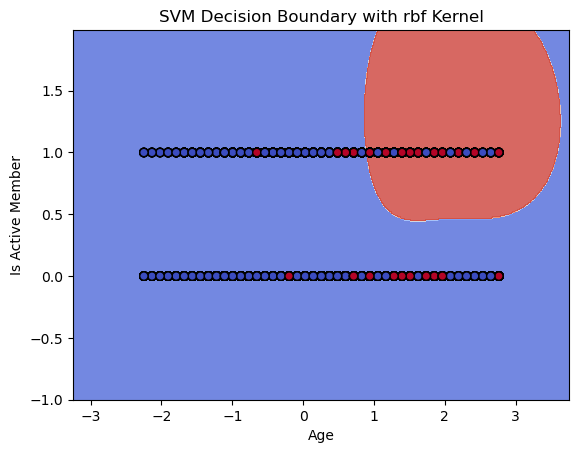

In [235]:
kernels = ['linear', 'rbf']
for kernel in kernels:
    svc = SVC(kernel=kernel, C=1.0, random_state=42)
    svc.fit(X_vis, y_vis)

    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X_vis['Age'], X_vis['Geography_Germany'], c=y_vis, edgecolor='k', cmap="coolwarm")
    plt.xlabel("Age")
    plt.ylabel("Is Active Member")
    plt.title(f"SVM Decision Boundary with {kernel} Kernel")
    plt.show()

# Step 8: Comparative analysis

#### **Overview**

The goal of churn prediction is to identify customers likely to leave a service. Key evaluation metrics include **accuracy**, **precision**, **recall**, and **F1-score**, with a particular focus on **recall** for the "Exited" class (class 1) to prioritize identifying as many churners as possible.

### **1. Naive Bayes**

- **Training Performance**:

  - Accuracy: **0.826**
  - Precision (Exited): **0.605**
  - Recall (Exited): **0.381**
  - F1-Score (Exited): **0.467**

- **After Cross-Validation and Oversampling**:

  - Accuracy: **0.722**
  - Precision (Exited): **0.386**
  - Recall (Exited): **0.690**
  - F1-Score (Exited): **0.495**

- **With Hyperparameter Tuning**:

  - **Best Hyperparameters**: `{'priors': None, 'var_smoothing': 1e-09}`
  - Accuracy: **0.722**
  - Precision (Exited): **0.386**
  - Recall (Exited): **0.690**
  - F1-Score (Exited): **0.495**

**Strengths**:

- Quick to train and test.
- Improved recall after oversampling and hyperparameter tuning.

**Weaknesses**:

- Relatively low precision, leading to a higher rate of false positives.

### **2. Decision Tree**

- **Performance Without Parameter Tuning**:

  - Accuracy: **0.83**
  - Precision (Exited): **0.62**
  - Recall (Exited): **0.32**
  - F1-Score (Exited): **0.42**

- **Performance After Grid Search Tuning**:

  - **Tuning Details**:
    - Metric Optimized: **Recall**
    - **Best Parameters**: `{'class_weight': {0: 1, 1: 5}, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}`
    - **Best Cross-Validation Recall**: **0.8**
    - **Best Model Accuracy**: **0.68**

- **Test Set Performance After Tuning**:

  - Accuracy: **0.69**
  - Precision (Exited): **0.37**
  - Recall (Exited): **0.81**
  - F1-Score (Exited): **0.50**

**Strengths**:

- **Improved Recall**: Post-tuning, the model significantly increased its ability to identify churners, achieving a high recall of **0.81** on the test set.
- Fair balance between recall and F1-Score.

**Weaknesses**:

- **Reduced Accuracy**: Tuning for recall led to a drop in overall accuracy (**0.69**).
- **Precision Decline**: Precision for churners dropped to **0.37**, indicating a higher rate of false positives.

### **3. Support Vector Machine (SVM)**

- **Before SMOTE**:

  - Validation Accuracy: **0.75**
  - Test Set Performance:
    - Accuracy: **0.73**
    - Precision (Exited): **0.42**
    - Recall (Exited): **0.75**
    - F1-Score (Exited): **0.54**

- **After Hyperparameter Tuning**:

  - **Best Parameters**: `{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}`
  - Test Set Performance:
    - Accuracy: **0.74**
    - Precision (Exited): **0.42**
    - Recall (Exited): **0.74**
    - F1-Score (Exited): **0.54**

**Strengths**:

- High **recall** for the churn class, making it a strong choice for identifying churners.
- Consistent performance before and after tuning.

**Weaknesses**:

- Lower overall **accuracy** and **precision**, indicating more false positives.

### **4. K-Nearest Neighbors (KNN)**

- **Validation Results**:

  - Euclidean distance with k=9 achieved the best recall: **0.7687**.

- **Test Set Performance**:

  - Accuracy: **0.76**
  - Precision (Exited): **0.44**
  - Recall (Exited): **0.62**
  - F1-Score (Exited): **0.51**

**Strengths**:

- Balanced performance across metrics.
- Achieved reasonable accuracy and recall for the churn class.

**Weaknesses**:

- Recall for churners is lower compared to Decision Tree and SVM, making it less effective for minimizing false negatives.
- Sensitive to the choice of distance metric and .

### **Summary Table**

| **Algorithm**         | **Accuracy** | **Precision (Exited)** | **Recall (Exited)** | **F1-Score (Exited)** | **Best Feature**                       |
| --------------------- | ------------ | ---------------------- | ------------------- | --------------------- | -------------------------------------- |
| Naive Bayes (Tuned)   | 0.72         | 0.386                  | 0.69                | 0.49                  | Fast and simple                        |
| Decision Tree (Tuned) | 0.69         | 0.37                   | 0.81                | 0.50                  | Best recall (Exited)                   |
| SVM (Tuned)           | 0.74         | 0.42                   | 0.74                | 0.54                  | Best balance for recall and F1         |
| KNN (Tuned)           | 0.76         | 0.44                   | 0.62                | 0.51                  | High accuracy and balanced performance |

### **Conclusions**

1. **If Recall for Churners is the Priority**:

   - **Decision Tree (Tuned)** is the best choice, achieving the highest recall (**0.81**) for the churn class. This is ideal for retention strategies where identifying all potential churners is critical, even at the expense of precision and overall accuracy.

2. **If Balance Between Precision and Recall is Important**:

   - **SVM (Tuned)** offers a good trade-off between recall (**0.74**) and F1-score (**0.54**) for churners. It achieves this while maintaining reasonable accuracy (**0.74**).

3. **If High Accuracy is Desired**:

   - **KNN (Tuned)** provides strong overall accuracy (**0.76**) and reasonable performance for churners with a recall of **0.62**. It is a suitable choice when the focus is on balanced performance across all metrics.

4. **If Simplicity and Efficiency are Required**:

   - **Naive Bayes** is fast and straightforward to implement but has the weakest precision (**0.386**) for churners, making it less effective in critical applications.